## Actividad Semanal -- 6, visualización
## Ciencia y analítica de Datos
## Profesora: María de la Paz Rico Fernández

#### Alejandro Jesús Vázquez Navarro - A01793146

In [22]:
# Para este paso utilizaré matplotlib, numpy y PCA de sklearn decomposition

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA



1.- Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [41]:
# Importamos los datos

path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
dfPCA = pd.read_csv(path, encoding="utf-8")

#Examen rápido de los datos

dfPCA.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [42]:
# Realizo la asignación de cabeceras:

# Asignación de cabeceras de acuerdo a la información proporcionada:

#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

# Creo un diccionario con los nombres de las columnas
col_dictionary = {'X1':'given_credit', 
                  'X2': 'gender', 
                  'X3': 'education', 
                  'X4': 'marital_status', 
                  'X5': 'age', 
                  'X6':'sep05_repayment',
                  'X7':'aug05_repayment',
                  'X8':'jul05_repayment',
                  'X9':'jun05_repayment',
                  'X10':'may05_repayment',
                  'X11':'abr05_repayment',
                  'X12': 'sep05_bill_statement',
                  'X13': 'aug05_bill_statement',
                  'X14': 'jul05_bill_statement',
                  'X15': 'jun05_bill_statement',
                  'X16': 'may05_bill_statement',
                  'X17': 'abr05_bill_statement',
                  'X18': 'sep05_previous_payment',
                  'X19': 'aug05_previous_payment',
                  'X20': 'jul05_previous_payment',
                  'X21': 'jun05_previous_payment',
                  'X22': 'mayu05_previous_payment',
                  'X23': 'abr05_previous_payment'                  
                  }

# Renombro las columnas para tener un mejor entendimiento del dataset
dfPCA.rename(columns = col_dictionary , inplace=True)

dfPCA = dfPCA.drop("ID", axis=1)

dfOriginal = dfPCA


2- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [25]:
# Para este paso utilizaré matplotlib, numpy y PCA de sklearn decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA





In [26]:
print(f'Composición del dataframe {dfPCA.shape}')
print(f'Columna del dfPCA {dfPCA.columns}')
print(f'Examen de los primeros 5 registros {dfPCA.head(5)}')
print(f'Revisión de los tipos de datos de cada columna {dfPCA.dtypes}')
print(f'Info general del dataframe {dfPCA.info()}')
print(f'Nulos en el dataframe {dfPCA.isna().any()}')

#Para fines prácticos del ejercicio, vamos a eliminar los valores Nan
dfPCA.dropna(inplace=True)



Composición del dataframe (30000, 24)
Columna del dfPCA Index(['given_credit', 'gender', 'education', 'marital_status', 'age',
       'sep05_repayment', 'aug05_repayment', 'jul05_repayment',
       'jun05_repayment', 'may05_repayment', 'abr05_repayment',
       'sep05_bill_statement', 'aug05_bill_statement', 'jul05_bill_statement',
       'jun05_bill_statement', 'may05_bill_statement', 'abr05_bill_statement',
       'sep05_previous_payment', 'aug05_previous_payment',
       'jul05_previous_payment', 'jun05_previous_payment',
       'mayu05_previous_payment', 'abr05_previous_payment', 'Y'],
      dtype='object')
Examen de los primeros 5 registros    given_credit  gender  education  marital_status   age  sep05_repayment  \
0         20000     2.0        2.0             1.0  24.0              2.0   
1        120000     2.0        2.0             2.0  26.0             -1.0   
2         90000     2.0        2.0             2.0  34.0              0.0   
3         50000     2.0        2.0    

4- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [27]:
# Realizaremos el describe

dfPCA.describe()

#Solo se perdieron 42 registros. No haremos un análisis más exhaustivo pero si fuera una aplicación productiva
#sí sería necesario realizar labores de imputaciones de datos con las diferentes técnicas que hemos visto en 
#la maestría

,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,may05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Con esta función podemos observar las siguientes medidas de tendencia central:

- Media: Es el promedio por cada variable
- std: Es la desviavión estandar para cada variable

Medidas de dispersión:

- Min: Valor mínimo de la variable
- 25%: Percentil 25%. Es el valor bajo el cual se encuentra el 25% de las observaciones en esa columna
- 50%: Percentil 25%. Es el valor bajo el cual se encuentra el 50% de las observaciones en esa columna
- 75%: Percentil 25%. Es el valor bajo el cual se encuentra el 75% de las observaciones en esa columna
- Max: Valor máximo de la variable

In [28]:
dfPCA.head()

,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,may05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


5- Realiza el conteo de las variables categóricas


In [29]:
# Primero, identificar cuáles son las variables categóricas:
#colCategoricas = dfPCA[["gender", "education", "marital_status"]]

generos = {1 : "male", 2 :"female"}

#Podemos transformar estos números a variables nominales
dfPCA["gender"] = dfPCA["gender"].map(generos)

educacion = {1 : "graduate school", 
              2 : "university", 
              3 : "high school", 
              4 : "others"}

dfPCA["education"] = dfPCA["education"].map(educacion)

marital_status = {1 : "married", 2 : "single", 3 : "others"}

dfPCA["marital_status"] = dfPCA["marital_status"].map(marital_status)


print('---' * 20) 
print(f'Cantidad de observaciones por género : \n{dfPCA["gender"].value_counts()}')
print('---' * 20) 
print(f'Cantidad de observaciones por educación : \n{dfPCA["education"].value_counts()}')
print('---' * 20) 
print(f'Cantidad de observaciones por estado civil : \n{dfPCA["marital_status"].value_counts()}')




------------------------------------------------------------
Cantidad de observaciones por género : 
female    18095
male      11863
Name: gender, dtype: int64
------------------------------------------------------------
Cantidad de observaciones por educación : 
university         14009
graduate school    10572
high school         4909
others               123
Name: education, dtype: int64
------------------------------------------------------------
Cantidad de observaciones por estado civil : 
single     15939
married    13643
others       322
Name: marital_status, dtype: int64


6. Escala los datos, si consideras necesario


In [30]:
from sklearn.preprocessing import StandardScaler
colRemove= ['education', 'marital_status', 'gender', 'Y']
dfPCA = dfPCA.loc[:, ~dfPCA.columns.isin(colRemove)]

colNumericas = dfPCA.columns

x = dfPCA.loc[:, colNumericas].values

x = StandardScaler().fit_transform(x)

7- Reduce las dimensiones con PCA, si consideras necesario.
* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
* Indica la importancia de las variables en cada componente

In [31]:
# Será interesante analizar cuáles son los componentes que aglutinan mayor cantidad de información
# Para lograrlo, aplicaré PCA sobre las variables numéricas ya escaladas

# Comencemos con un tratamiento desde cero considerando todas las variables:
pcs = PCA(n_components=20)

pcs.fit(dfPCA)


pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance':pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary.round(4)

,Standard deviation,Proportion of variance,Cumulative proportion
0,166585.0753,0.6106,0.6106
1,115824.7017,0.2952,0.9057
2,37256.8166,0.0305,0.9363
3,27747.1030,0.0169,0.9532
4,20698.6823,0.0094,0.9626
5,20278.0072,0.0090,0.9717
6,18520.7019,0.0075,0.9792
7,17040.2350,0.0064,0.9856
8,16294.1101,0.0058,0.9915
9,11615.2249,0.0030,0.9944


In [32]:
# Hagamos una transposición para mejor lectura

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,166585.08,115824.70,37256.82,27747.10,20698.68,20278.01,18520.70,17040.23,16294.11,11615.22,10413.1,8786.75,8197.65,9.11,2.06,0.94,0.73,0.6,0.51,0.42
Proportion of variance,0.61,0.30,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
Cumulative proportion,0.61,0.91,0.94,0.95,0.96,0.97,0.98,0.99,0.99,0.99,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


Con esta tabla podemos calcular fácilmente que:

- z1 accounts for 61.01% del total de varianza y
- z2 aporta un total de 29.51%


Esto suma un 90.57% del total de varianza.

Significa pues que si removemos el PC2 tendríamos aún 61.01% de varianza. Este componente corresponde al crédito ortorgado

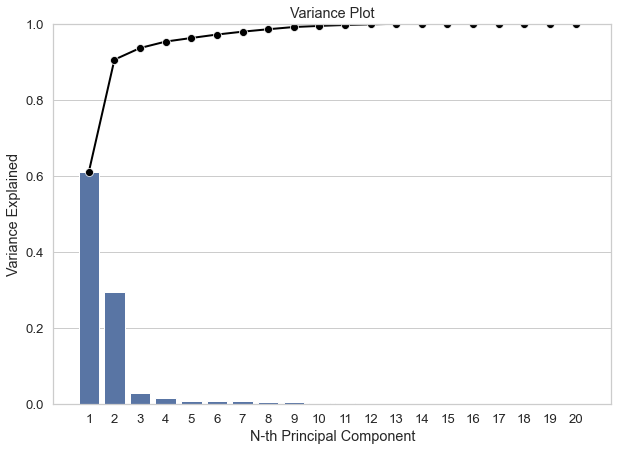

In [33]:
# Hagamos una gráfica para representarlo y determinar el número mínimo de componentes:

import seaborn as sns

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Variance Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Esta gráfica ya nos ayuda a contestar cuáles son los principales componente del dataset.

Son:

- given_credit con un **61.01%** del total de varianza y
- age que aporta un total de **29.51%**

sumando **90.57%**

In [34]:
# Examinemos los componentes:


pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.114,2.0623,0.9386,0.7321,0.5963,0.512,0.4186
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000


In [35]:
# Es necesario identificar magnitudes y direcciones de cada componente para determinar importancia de cada variable 
# en cada componente:

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = dfPCA.iloc[:, 0:].columns
                                )

# Redondeo a 4 cifras para una mejor lectura
pcsComponents_dfX.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
given_credit,0.4911,0.8693,-0.0206,-0.0184,-0.0441,0.0169,-0.0011,0.0010,0.0095,0.0038,0.0058,0.0000,0.0019,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
age,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,1.0000,0.0049,0.0011,0.0002,-0.0003,-0.0000,-0.0005
sep05_repayment,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0007,0.3273,-0.6285,-0.6308,0.2801,-0.1439,-0.0280
aug05_repayment,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0017,0.4158,-0.4361,0.2838,-0.5808,0.4548,0.1104
jul05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0023,0.4421,-0.1177,0.5643,0.1453,-0.6224,-0.2526
jun05_repayment,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0020,0.4421,0.2326,0.1548,0.5754,0.3266,0.5374
may05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0027,0.4179,0.3883,-0.1965,0.0471,0.3470,-0.7165
abr05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0023,0.3930,0.4428,-0.3748,-0.4794,-0.3976,0.3480
sep05_bill_statement,0.3886,-0.2211,-0.5489,-0.2049,0.3169,0.0026,-0.4563,0.0073,0.0703,0.1727,-0.2674,-0.2046,-0.0059,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
aug05_bill_statement,0.3815,-0.2262,-0.3910,-0.0378,0.0115,-0.0805,0.5269,-0.0660,0.0993,0.0079,0.3511,0.4765,0.0160,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000


Con esta tabla podemos interpretar fácilmente lo siguiente:

- El primer componente principal (PC1) está dominado por dos variables _given_credit_ con una magnitud positiva de **0.4911** y por _sep05_bill_statement_ con un peso de **0.3886**

- El segundo componente está completamente dominado por la variable __given_credit__ con un peso de **0.8693**

No estoy agregando el PC3 debido a su poca aportación al total de varianza acumulada: **3.05**

---

8- Elabora los histogramas de los atributos para visualizar su distribución

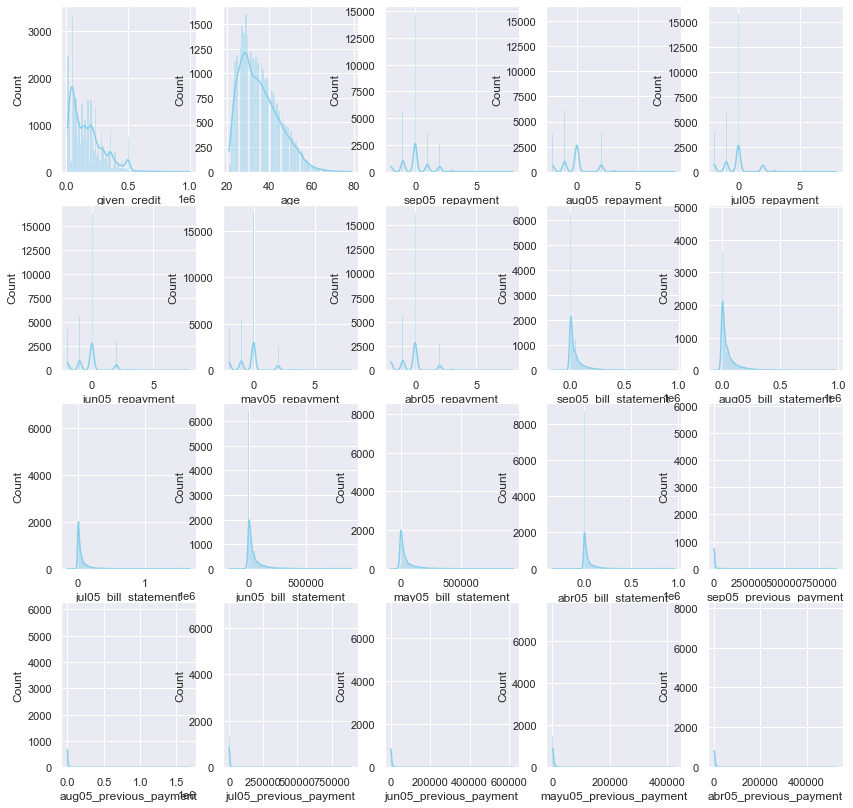

In [36]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

df = dfPCA.reset_index(drop=True)

fig, axs = plt.subplots(4, 5, figsize=(14, 14))

lstColumnas = dfPCA.columns

row =0
col =0
k = 0

for row in range(0, 4):
    col =0
    
    for col in range(0, 5):
        #print(row, col)
        #print(k)
        if k <20:
            sns.histplot(data=df, x=lstColumnas[k], kde=True, color="skyblue", ax=axs[row, col])
            col +=1
            k+=1
k+=1
row +=1

plt.show()



9- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [43]:
# Una gráfica interesante sería una que muestre la edad con el crédito otorgado:

dfBase = dfOriginal

generos = {1 : "male", 2 :"female"}

#Podemos transformar estos números a variables nominales
dfBase["gender"] = dfBase["gender"].map(generos)



educacion = {1 : "graduate school", 
              2 : "university", 
              3 : "high school", 
              4 : "others"}

dfBase["education"] = dfBase["education"].map(educacion)

marital_status = {1 : "married", 2 : "single", 3 : "others"}

dfBase["marital_status"] = dfBase["marital_status"].map(marital_status)



In [44]:
dfBase.head()

,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,may05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
0,20000,female,university,married,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,female,university,single,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,female,university,single,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,female,university,married,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,male,university,married,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


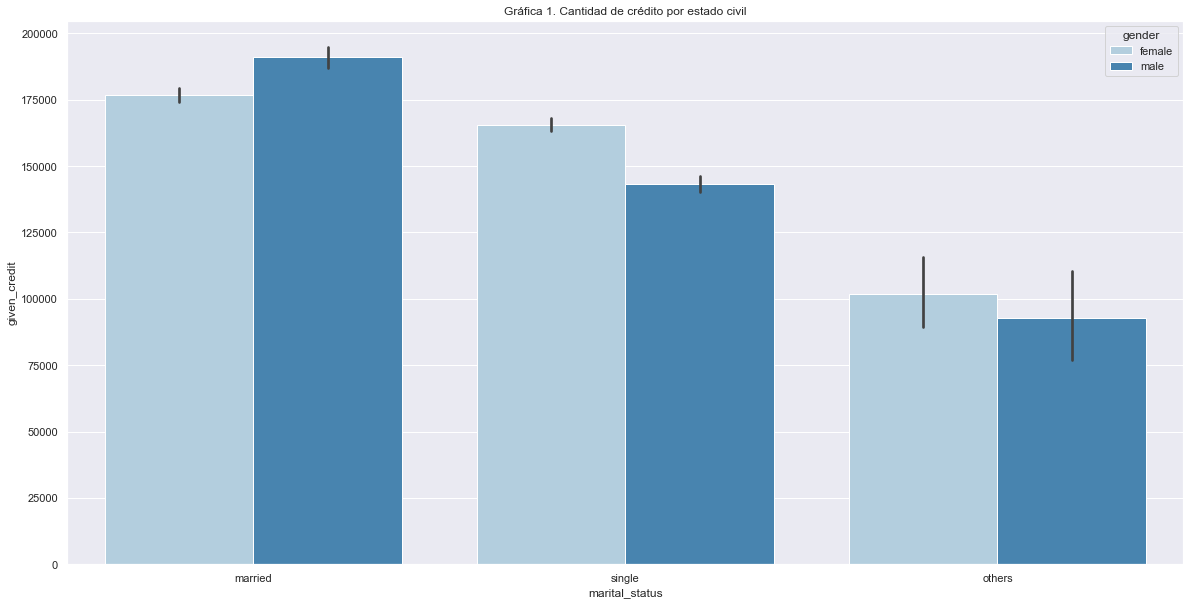

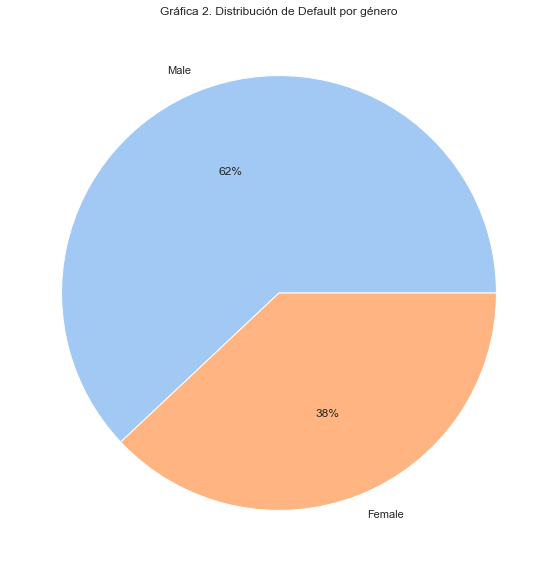

Text(0.5, 0.98, 'Gráfica 3. Cantidad de créditos datos con Default por género')

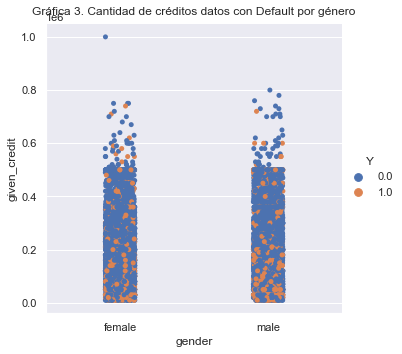

In [115]:
sns.set(rc={'figure.figsize':(20,10)})

sns.barplot(x = 'marital_status', y = 'given_credit', hue = 'gender', data = dfBase,
            palette = 'Blues', edgecolor = 'w').set_title("Gráfica 1. Cantidad de crédito por estado civil", fontsize=12)

dfBase.groupby(['age','given_credit']).mean()

plt.show()

ax.ticklabel_format(useOffset=False, style='plain')

dfScattered = dfBase[(dfBase.marital_status=="married")]
dfScattered.head()

dfDefault = dfScattered.groupby(["gender"], as_index=False)["Y"].count()

labels = ['Male', 'Female']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#sns.catplot(data=dfBase, x="gender", y="given_credit", hue="Y")
#dfDefault = dfScattered[(dfScattered.Y==1)]
#sns.catplot(data=dfDefault, x="gender", y="given_credit")

#create pie chart
plt.pie(dfDefault["Y"], labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Gráfica 2. Distribución de Default por género", fontsize = 12)
plt.show()

sns.catplot(data=dfScattered, x="gender", y="given_credit", hue="Y").fig.suptitle(
    "Gráfica 3. Cantidad de créditos datos con Default por género",
                  fontsize=12)



10- Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

La **primera gráfica** muestra la distribución de cantidades por estado civil y por género. Se puede observar que el estado civil "casados" muestra una mayor concentración cantidad de dinero otorgada para los créditos. También se puede observar que las mujeres solteras son las que tienen una mayor asignación de crédito otorgado. A partir de esta información pueden diseñarse planes de acción de otorgamiento de crédito o campañas de crédito, sin embargo solo con estos datos es aventurado llegar a conclusiones contundentes. Solo nos dan una dirección para profundizar otros análisis.

La **segunda gráfica** filtra por estado civil "casados" con impago y por género. Es relevante observar que el género femenino aglutina una mayor cantidad de impago que el masculino para los casados. Sería interesante analizar la zona geográfica de los deudores para conocer la población económicamente activa y segmentarla por género. ¿Por qué las mujeres tienen mayor impago que los hombres en estado civil casados? Es una pregunta imperativa para ser contestada.

La **tercera gráfica** solo muestra la cantidad de créditos otorgados por impago y por género. Da una sensación, nuevamente, que en el género femenino existe una particularidad pues tiene los créditos otorgados más altos. Nuevamente, sería necesitario conocer mayores variables sociodemográficas para poder contestar planteamientos de hipótesis con respecto a quíen otorgar un crédito o no.